In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\a_bot


In [2]:
# Create a config.py file in the current directory
with open("config.py", "w") as file:
    file.write('api_key = "c923ff923caf656ee3a549d0b4661a1b"')  # Replace with your actual API key

print("config.py created successfully!")

config.py created successfully!


In [3]:
import os

print("Files in directory:", os.listdir("."))

Files in directory: ['.anaconda', '.bash_history', '.conda', '.condarc', '.continuum', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.virtual_documents', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'Assignment 1.ipynb', 'Assignment 2.ipynb', 'Assignment 3.ipynb', 'Capstone 1.ipynb', 'Capstone 2.ipynb', 'Capstone 3.ipynb', 'Capstone 4.ipynb', 'Capstone 5.ipynb', 'Capstone 6.ipynb', 'config.py', 'Contacts', 'Cookies', 'Data Analytics Lesson 1.ipynb', 'Data Analytics Lesson 2.ipynb', 'Data Analytics Lesson 3.ipynb', 'Data Analytics Lesson 4.ipynb', 'Data Analytics Lesson 5.ipynb', 'Data Analytics Lesson 6.ipynb', 'Data Analytics Lesson 7.ipynb', 'Data Analytics Lesson 8.ipynb', 'Data Analytics Lesson 9.ipynb', 'Desktop', 'Documents', 'Downloads', 'election_results.txt', 'Favorites', 'financial_analysis.txt', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'N

In [4]:
from config import api_key

print(f"My API Key: {api_key}")

My API Key: c923ff923caf656ee3a549d0b4661a1b


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [59]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [13]:
from citipy import citipy

In [23]:
import random

latitudes = [random.uniform(-90, 90) for _ in range(1500)]
longitudes = [random.uniform(-180, 180) for _ in range(1500)]
coordinates = list(zip(latitudes, longitudes))

In [25]:
from citipy import citipy

cities = []
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)

In [27]:
import requests

api_key = "c923ff923caf656ee3a549d0b4661a1b"
base_url = "http://api.openweathermap.org/data/2.5/weather"

city_data = []
for city in cities:
    try:
        response = requests.get(f"{base_url}?q={city}&appid={api_key}&units=metric")
        data = response.json()
        city_data.append({
            "City": city,
            "Lat": data["coord"]["lat"],
            "Lng": data["coord"]["lon"],
            "Max Temp": data["main"]["temp_max"],
            "Humidity": data["main"]["humidity"],
            "Cloudiness": data["clouds"]["all"],
            "Wind Speed": data["wind"]["speed"],
            "Country": data["sys"]["country"],
            "Date": data["dt"]
        })
    except KeyError:
        print(f"Skipping city: {city}")


Skipping city: tranovaho
Skipping city: tevragh zeina
Skipping city: san antonio del estrecho
Skipping city: taiohae
Skipping city: puerto san carlos
Skipping city: marsaskala
Skipping city: kulia village
Skipping city: port glaud
Skipping city: abu 'arish
Skipping city: cargados carajos
Skipping city: 'ohonua
Skipping city: bayan nur
Skipping city: gueltat zemmour
Skipping city: mahabe
Skipping city: takamaka
Skipping city: aq qayeh
Skipping city: laayoune plage
Skipping city: vingt cinq
Skipping city: turkler
Skipping city: vohimanitra
Skipping city: ahau
Skipping city: fuvahmulah
Skipping city: yangor
Skipping city: seogwipo
Skipping city: ayod
Skipping city: savave village
Skipping city: saratamata
Skipping city: villa alberto andres alvarado aramburo
Skipping city: malir cantonment
Skipping city: fannuj
Skipping city: ordos


In [29]:
import pandas as pd

weather_df = pd.DataFrame(city_data)
print(weather_df.head())

           City      Lat      Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   east london -33.0153  27.9116     19.72        83          29        2.38   
1          arno  60.1167  18.6333      7.43        84         100        7.03   
2  mirpur sakro  24.5474  67.6277     25.14        50           0        3.99   
3   roschinskiy  53.2669  40.0039     -1.12        97          96        3.16   
4       aasiaat  68.7098 -52.8699    -11.90        62         100        9.00   

  Country        Date  
0      ZA  1731704316  
1      SE  1731704316  
2      PK  1731704316  
3      RU  1731704316  
4      GL  1731704316  


In [31]:
weather_df.to_csv("weather_data.csv", index=False)

### Scatter Plots showcasing the Relationship Between Weather Variables and Latitude

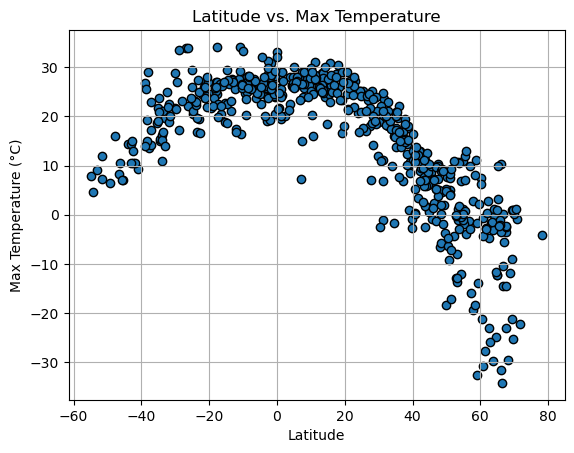

In [87]:
### Latitude vs. Temperature: 

import matplotlib.pyplot as plt

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="black")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid()
plt.show()

In [83]:
### Define Regression Function: Create a function to perform linear regression and plot

from scipy.stats import linregress

def plot_regression(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    plt.scatter(x, y)
    plt.plot(x, regression_line, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}", 
                 xy=(min(x), max(y)), fontsize=12, color="red")
    plt.grid()
    plt.show()

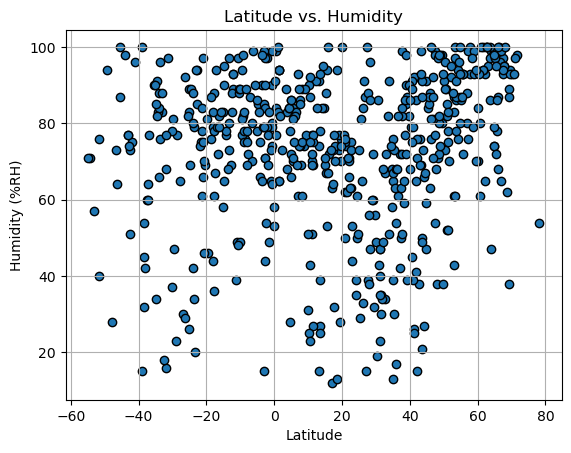

In [89]:
### Latitude vs. Humidity: 

import matplotlib.pyplot as plt

plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%RH)")
plt.grid()
plt.show()

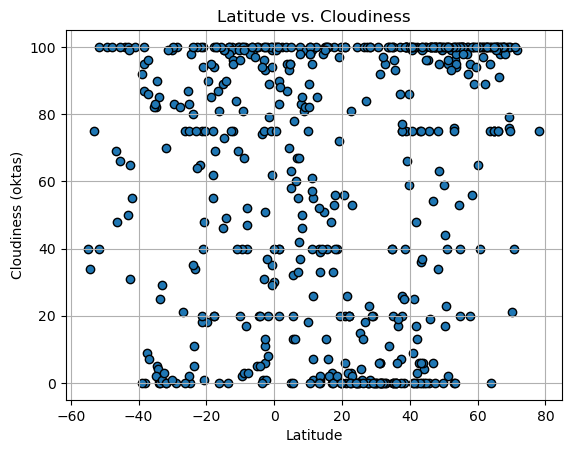

In [41]:
### Latitude vs. Cloudiness

import matplotlib.pyplot as plt

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (oktas)")
plt.grid()
plt.show()

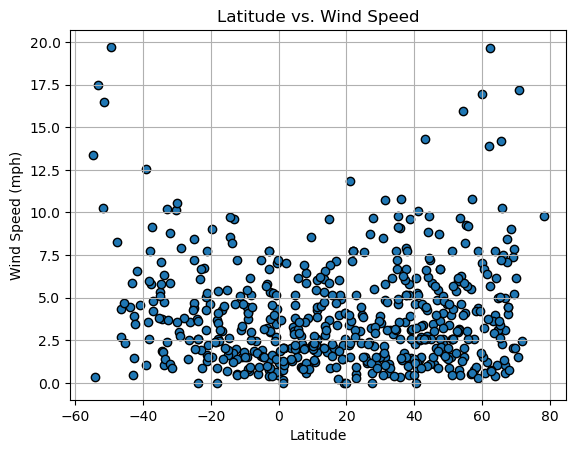

In [43]:
### Latitude vs. Wind Speed

import matplotlib.pyplot as plt

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

### Linear Regression (Separate by Hemisphere)

In [109]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

### Define Regression Function: Create a function to perform linear regression and plot

def plot_regression(x, y, title, xlabel, ylabel):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    # Plot the scatter plot
    plt.scatter(x, y, edgecolor="black", label="Data Points")

    # Plot the regression line
    plt.plot(x, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Annotate R-squared value
    plt.annotate(f"$R^2 = {r_value**2:.2f}$", 
                 xy=(min(x), max(y)), 
                 fontsize=12, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend()
    plt.show()

### Split Data by Hemisphere
northern_hemisphere = weather_df[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df[weather_df["Lat"] < 0]

### LATITUDE vs TEMPERATURE

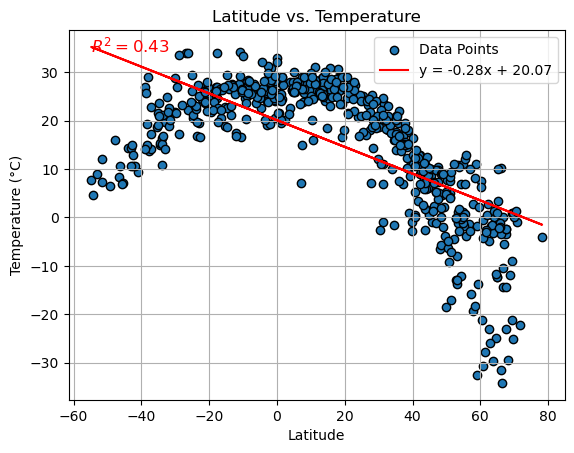

In [135]:
### Apply the Function

plot_regression(
    weather_df["Lat"], 
    weather_df["Max Temp"], 
    "Latitude vs. Temperature",
    "Latitude",
    "Temperature (°C)"
)

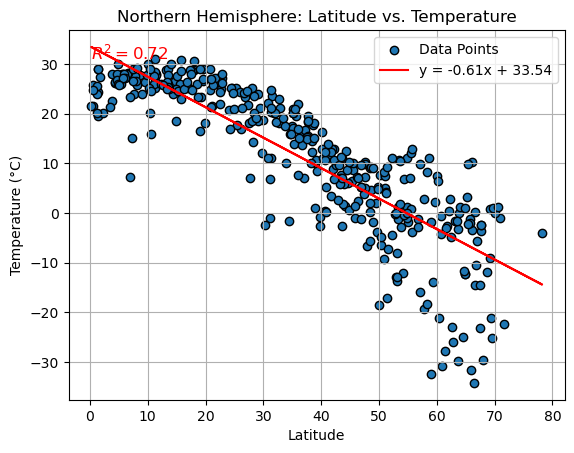

In [149]:
### Northern Hemisphere: LATITUDE vs TEMPERATURE

plot_regression(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Max Temp"], 
    "Northern Hemisphere: Latitude vs. Temperature",
    "Latitude",
    "Temperature (°C)"
)

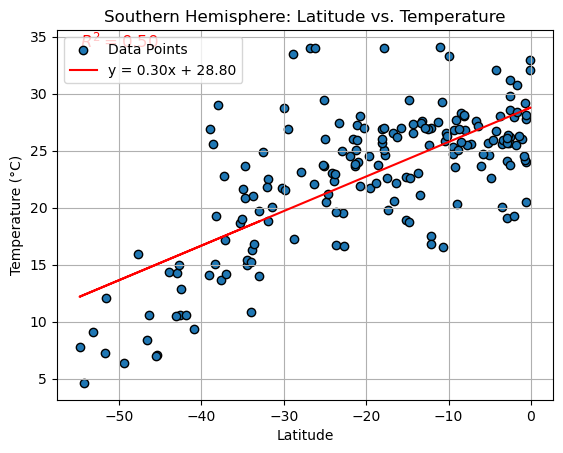

In [147]:
### Southern Hemisphere: LATITUDE vs TEMPERATURE

plot_regression(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Max Temp"], 
    "Southern Hemisphere: Latitude vs. Temperature",
    "Latitude",
    "Temperature (°C)"
)

### LATITUDE vs HUMIDITY

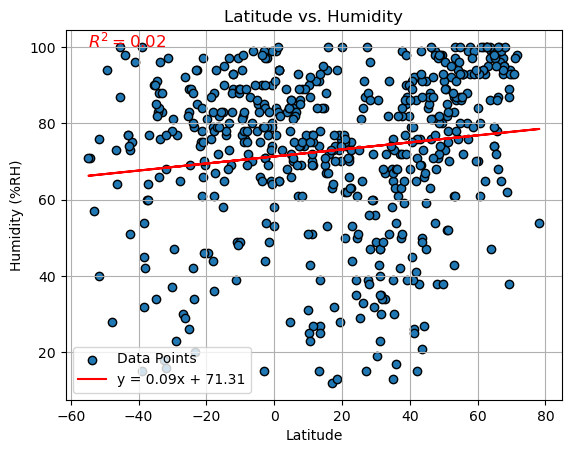

In [145]:
plot_regression(
    weather_df["Lat"], 
    weather_df["Humidity"], 
    "Latitude vs. Humidity",
    "Latitude",
    "Humidity (%RH)"
)

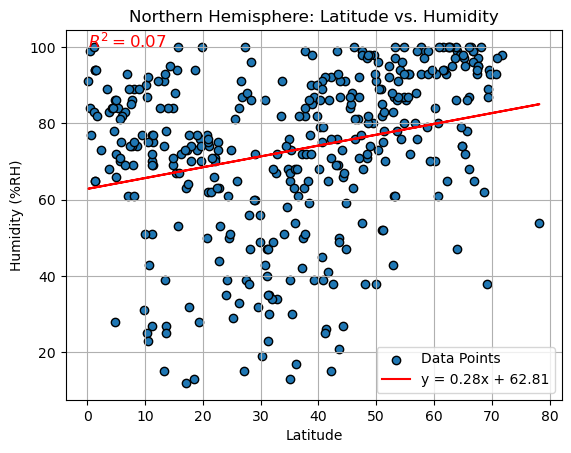

In [151]:
### Northern Hemisphere: LATITUDE vs HUMIDITY

plot_regression(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Humidity"], 
    "Northern Hemisphere: Latitude vs. Humidity",
    "Latitude",
    "Humidity (%RH)"
)

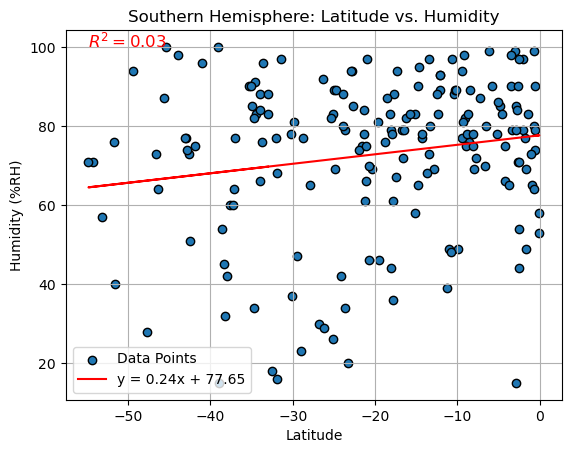

In [153]:
### Southern Hemisphere: LATITUDE vs HUMIDITY

plot_regression(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Humidity"], 
    "Southern Hemisphere: Latitude vs. Humidity",
    "Latitude",
    "Humidity (%RH)"
)

### LATITUDE vs CLOUDINESS

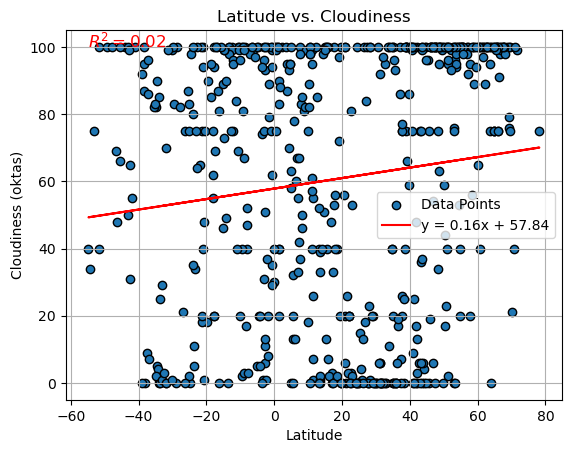

In [155]:
plot_regression(
    weather_df["Lat"], 
    weather_df["Cloudiness"], 
    "Latitude vs. Cloudiness",
    "Latitude",
    "Cloudiness (oktas)"
)

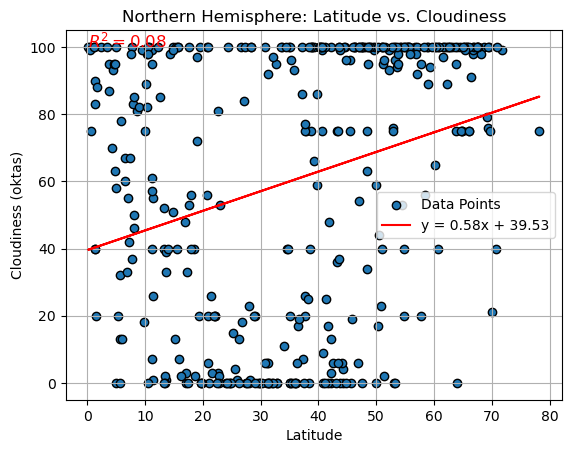

In [157]:
### Northern Hemisphere: LATITUDE vs CLOUDINESS

plot_regression(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Cloudiness"], 
    "Northern Hemisphere: Latitude vs. Cloudiness",
    "Latitude",
    "Cloudiness (oktas)"
)

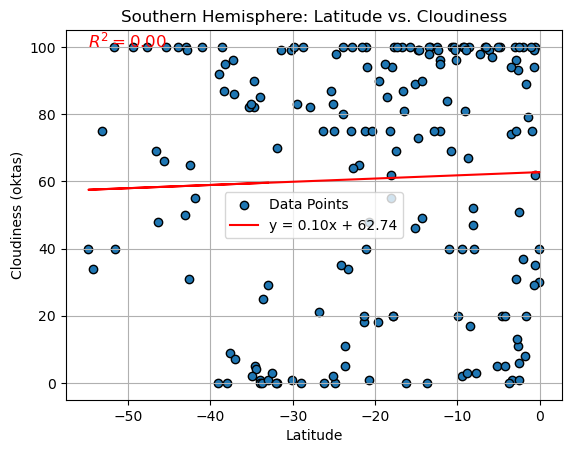

In [159]:
### Southern Hemisphere: LATITUDE vs CLOUDINESS

plot_regression(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Cloudiness"], 
    "Southern Hemisphere: Latitude vs. Cloudiness",
    "Latitude",
    "Cloudiness (oktas)"
)

### LATITUDE vs WIND SPEED

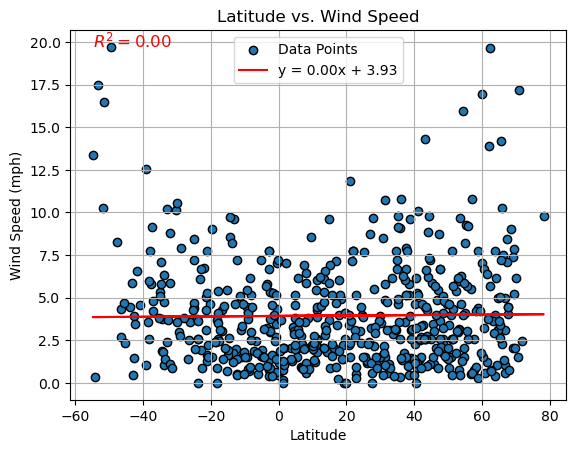

In [161]:
plot_regression(
    weather_df["Lat"], 
    weather_df["Wind Speed"], 
    "Latitude vs. Wind Speed",
    "Latitude",
    "Wind Speed (mph)"
)

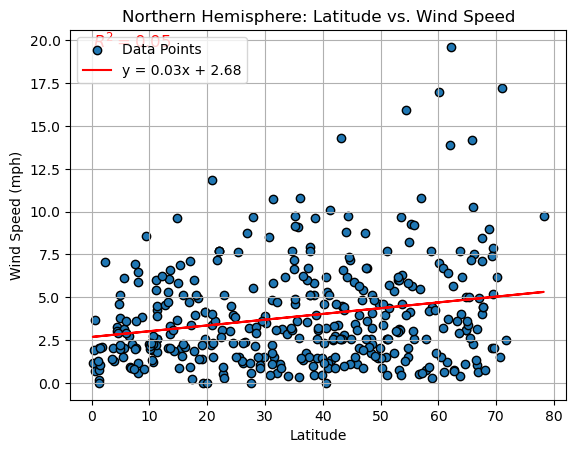

In [163]:
### Northern Hemisphere: LATITUDE vs WIND SPEED

plot_regression(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Wind Speed"], 
    "Northern Hemisphere: Latitude vs. Wind Speed",
    "Latitude",
    "Wind Speed (mph)"
)

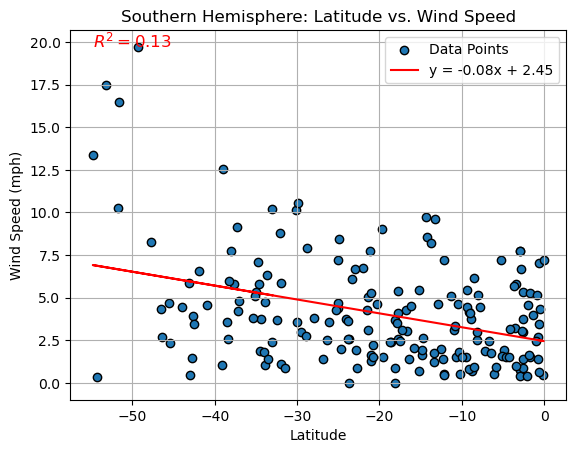

In [165]:
### Southern Hemisphere: LATITUDE vs WIND SPEED

plot_regression(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Wind Speed"], 
    "Southern Hemisphere: Latitude vs. Wind Speed",
    "Latitude",
    "Wind Speed (mph)"
)

In [169]:
pip install geoviews

     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 56.0/56.0 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/563.2 kB ? eta -:--:--
   ---------- ----------------------------- 153.6/563.2 kB 4.6 MB/s eta 0:00:01
   ----------------------- ---------------- 337.9/563.2 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  563.2/563.2 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------  563.2/563.2 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 563.2/563.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.8 MB 8.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/6.8 MB 6.2 MB/s eta 0:00:02
   ---- ------

In [171]:
pip install holoviews

Note: you may need to restart the kernel to use updated packages.


In [173]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd

# Load the CSV file created in Part 1
city_data_df = pd.read_csv("weather_data.csv")
print(city_data_df.head())

           City      Lat      Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   east london -33.0153  27.9116     19.72        83          29        2.38   
1          arno  60.1167  18.6333      7.43        84         100        7.03   
2  mirpur sakro  24.5474  67.6277     25.14        50           0        3.99   
3   roschinskiy  53.2669  40.0039     -1.12        97          96        3.16   
4       aasiaat  68.7098 -52.8699    -11.90        62         100        9.00   

  Country        Date  
0      ZA  1731704316  
1      SE  1731704316  
2      PK  1731704316  
3      RU  1731704316  
4      GL  1731704316  


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
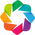

In [177]:
import geoviews as gv
from geoviews import opts
import holoviews as hv
hv.extension('bokeh')

In [183]:
# Create a GeoViews Points object
cities_map = gv.Points(
    city_data_df, 
    kdims=["Lng", "Lat"],  # Longitude and Latitude for map
    vdims=["City", "Humidity"]  # Display city name and humidity on hover
)

# Customize the map with options
cities_map.opts(
    opts.Points(
        size=hv.dim("Humidity") * 0.1,  # Scale point size by humidity
        color="blue",  # Point color
        tools=["hover"],  # Add hover tool for interactivity
        width=800, 
        height=600,
        title="City Humidity Map"
    )
)

:Points   [Lng,Lat]   (City,Humidity)

In [185]:
import geoviews.feature as gf

# Add background tiles
tiles = gv.tile_sources.CartoLight()

# Overlay the points on the tile map
map_with_tiles = tiles * cities_map
map_with_tiles

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

In [187]:
# Filter for ideal weather conditions
ideal_cities_df = city_data_df[
    (city_data_df["Max Temp"] > 21) &
    (city_data_df["Max Temp"] < 27) &
    (city_data_df["Wind Speed"] < 4.5) &
    (city_data_df["Cloudiness"] == 0)
]

# Display the filtered DataFrame
print(f"Number of cities matching criteria: {len(ideal_cities_df)}")
print(ideal_cities_df.head())

Number of cities matching criteria: 12
             City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
2    mirpur sakro  24.5474  67.6277     25.14        50           0   
8          center  31.5107 -96.4247     23.47        35           0   
107       tripoli  32.8752  13.1875     21.02        72           0   
124        gebeit  21.0667  36.3167     21.50        74           0   
165   weatherford  32.7593 -97.7972     22.94        34           0   

     Wind Speed Country        Date  
2          3.99      PK  1731704316  
8          1.54      US  1731704317  
107        3.13      LY  1731704328  
124        1.51      SD  1731704331  
165        0.89      US  1731704337  


In [189]:
# Create the hotel_df with required columns
hotel_df = ideal_cities_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()
hotel_df["Hotel Name"] = ""  # Placeholder for hotel names
print(hotel_df.head())

             City Country      Lat      Lng  Humidity Hotel Name
2    mirpur sakro      PK  24.5474  67.6277        50           
8          center      US  31.5107 -96.4247        35           
107       tripoli      LY  32.8752  13.1875        72           
124        gebeit      SD  21.0667  36.3167        74           
165   weatherford      US  32.7593 -97.7972        34           


### Use the Geoapify API to Find Hotels

In [193]:
import requests

# Geoapify API key
geoapify_key = "e1680b8ef22e4539b73f6c47c1e78731"

# Search for hotels within 10,000 meters for each city
for index, row in hotel_df.iterrows():
    lat, lng = row["Lat"], row["Lng"]
    params = {
        "categories": "accommodation.hotel",
        "filter": f"circle:{lng},{lat},10000",
        "limit": 1,
        "apiKey": geoapify_key
    }
    response = requests.get("https://api.geoapify.com/v2/places", params=params)
    data = response.json()

    # Extract hotel name if available
    if data["features"]:
        hotel_name = data["features"][0]["properties"]["name"]
        hotel_df.at[index, "Hotel Name"] = hotel_name
    else:
        hotel_df.at[index, "Hotel Name"] = "No hotel found"

# Display the updated DataFrame
print(hotel_df.head())

             City Country      Lat      Lng  Humidity  \
2    mirpur sakro      PK  24.5474  67.6277        50   
8          center      US  31.5107 -96.4247        35   
107       tripoli      LY  32.8752  13.1875        72   
124        gebeit      SD  21.0667  36.3167        74   
165   weatherford      US  32.7593 -97.7972        34   

                             Hotel Name  
2                        No hotel found  
8                  Quality Inn & Suites  
107                    فندق صحراء ليبيا  
124                      No hotel found  
165  La Quinta Inn & Suites Weatherford  


In [197]:
# Create GeoViews Points object
cities_with_hotels_map = gv.Points(
    hotel_df,
    kdims=["Lng", "Lat"],
    vdims=["City", "Country", "Hotel Name", "Humidity"]
)

# Customize the map
cities_with_hotels_map.opts(
    opts.Points(
        size=hv.dim("Humidity") * 0.15,
        color="blue",
        tools=["hover"],  # Enable hover for interactivity
        width=800,
        height=600,
        title="Ideal Vacation Spots with Hotels"
    )
)

# Add background tiles
tiles = gv.tile_sources.CartoLight()

# Combine map and points
map_with_hotels = tiles * cities_with_hotels_map
map_with_hotels


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Country,Hotel Name,Humidity)

In [199]:
### Save the Data
hotel_df.to_csv("ideal_vacation_hotels.csv", index=False)